### Random Forest

In [1]:
# Importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier

from helper import save_model, load_model
from ML_helper import cross_validation, train_and_evaluate

In [2]:
# Configuration
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', 500)

# Filter Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
df = pd.read_csv("Modified Data/ML_ready.csv")
df.head()

,Gender,Age Range,Heart Attack,Angina or Coronary Heart Disease,Stroke,High Blood Pressure,Cholesterol Is High,Taking medicine for high cholesterol,Diabetes,Kidney Disease,Arthritis,General Health,Number of Days Physical Health Not Good,Number of Days Mental Health Not Good,Exercise in Past 30 Days,Physical activities frequence,Smoked at Least 100 Cigarettes,Smokeless Tobacco Products,E-cigarettes Frequency,Days in past 30 had alcoholic beverage,BMI_Category
0,0,12,0,0,0,1,0,0,1,0,0,3,30,30,0,0,0,0,0,0,3
1,0,12,0,0,0,1,1,1,0,0,1,3,30,30,1,0,0,0,0,0,2
2,0,12,0,0,0,1,1,1,0,0,1,1,6,2,1,5,1,0,0,0,1
3,0,11,0,0,0,0,0,0,0,0,1,3,2,30,1,0,0,0,0,0,2
4,0,11,0,0,0,1,0,0,1,0,1,1,30,30,1,0,0,1,0,2,2


In [4]:
target = "Heart Attack"
X = df.drop(columns=[target])
y = df[target]

In [5]:
# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
metrices = {
    "Confusion_metrix": confusion_matrix,
    "F1_score": f1_score,
    "AUC-ROC_Score": roc_auc_score,
    "Classification_report": classification_report
    }

In [7]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [5, 10, None],  # Maximum depth
    'min_samples_split': [2, 5],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples in leaf node
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='roc_auc', verbose=1)
rf_grid.fit(X_train, y_train)

print(f"🔹 Best Random Forest Params: {rf_grid.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

🔹 Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [8]:
# Get best hyperparameters
best_rf = rf_grid.best_estimator_

🔹 AUC-ROC Score: 0.8868
🔹 F1 Score: 0.2294
📌 Confusion Matrix:
[[81625   350]
 [ 4037   653]]

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     81975
           1       0.65      0.14      0.23      4690

    accuracy                           0.95     86665
   macro avg       0.80      0.57      0.60     86665
weighted avg       0.94      0.95      0.93     86665




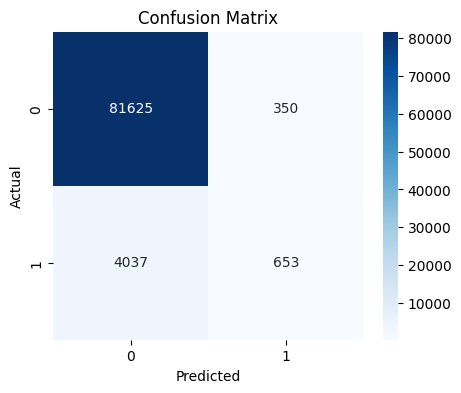

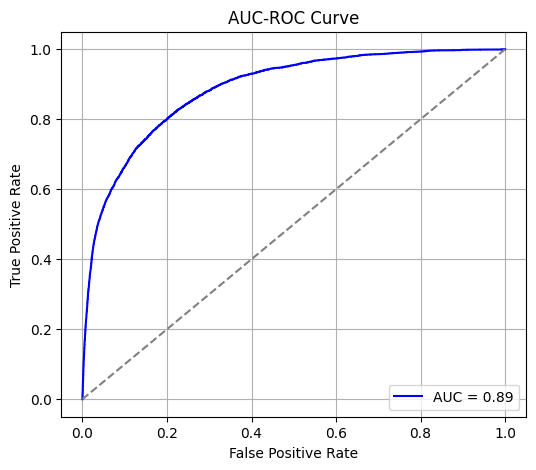

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [9]:
train_and_evaluate(best_rf, X_train, X_test, y_train, y_test)

In [10]:
save_model(best_rf, "RandomForest.pkl")

Model saved successfully as Model/RandomForest.pkl
